# Geospatial v1 

In [1]:
import uuid
import geopandas, pandas
from shapely import wkt
from shapely.geometry.multipolygon import MultiPolygon
from cognite.client import CogniteClient
from cognite.client.data_classes.geospatial import (Feature,FeatureType,FeatureList)

## Input data

### Countries

In [2]:
countries_4326 = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
countries_4326.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot:>

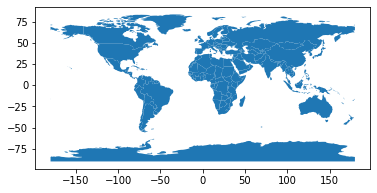

In [3]:
countries_4326.plot()

## Feature types and features

### Create Cognite API client

In [4]:
client = CogniteClient()

## Pre clean up

In [5]:
try:
    client.geospatial.delete_feature_types(external_id="countries_ft", recursive=True)
except:
    pass

### Create a simple feature type

In [6]:
# NBVAL_IGNORE_OUTPUT
countries_ft = client.geospatial.create_feature_types(
    FeatureType(
        external_id="countries_ft",
        properties={
            "name": {"type": "STRING", "size": 256},
            "continent": {"type": "STRING", "size": 256},
            "geometry": {"type": "GEOMETRY", "srid": 4326},
            "population": {"type": "LONG"},
        }
    )
)
countries_ft

,value
external_id,countries_ft
created_time,1647617459506
last_updated_time,1647617459506
properties,"{'name': {'type': 'STRING', 'size': 256}, 'con..."
search_spec,{'externalIdIdx': {'properties': ['externalId'...


## Populate the feature types

In [7]:
# NBVAL_IGNORE_OUTPUT
country_features = [
    Feature(
        external_id=country["name"],
        name=country["name"],
        continent=country["continent"],
        geometry={"wkt": country["geometry"].wkt},
        population=country["pop_est"],
    )
    for country in countries_4326.to_dict('records')
]

client.geospatial.create_features("countries_ft", country_features)

,external_id,name,continent,geometry,population,created_time,last_updated_time
0,Fiji,Fiji,Oceania,{'wkt': 'MULTIPOLYGON (((180 -16.0671326636424...,920938,1647617459880,1647617459880
1,Tanzania,Tanzania,Africa,{'wkt': 'POLYGON ((33.90371119710453 -0.950000...,53950935,1647617459880,1647617459880
2,W. Sahara,W. Sahara,Africa,{'wkt': 'POLYGON ((-8.665589565454809 27.65642...,603253,1647617459880,1647617459880
3,Canada,Canada,North America,{'wkt': 'MULTIPOLYGON (((-122.84000000000003 4...,35623680,1647617459880,1647617459880
4,United States of America,United States of America,North America,{'wkt': 'MULTIPOLYGON (((-122.84000000000003 4...,326625791,1647617459880,1647617459880
...,...,...,...,...,...,...,...
172,Serbia,Serbia,Europe,{'wkt': 'POLYGON ((18.829824792873946 45.90887...,7111024,1647617459880,1647617459880
173,Montenegro,Montenegro,Europe,{'wkt': 'POLYGON ((20.070700000000045 42.58863...,642550,1647617459880,1647617459880
174,Kosovo,Kosovo,Europe,{'wkt': 'POLYGON ((20.590246546680227 41.85540...,1895250,1647617459880,1647617459880
175,Trinidad and Tobago,Trinidad and Tobago,North America,{'wkt': 'POLYGON ((-61.68000000000001 10.76000...,1218208,1647617459880,1647617459880


## Search for features

### Search with with an empty filter

In [8]:
# NBVAL_IGNORE_OUTPUT
countries = client.geospatial.search_features("countries_ft", filter={}, limit=1000)
countries

,external_id,name,continent,geometry,population,created_time,last_updated_time
0,Fiji,Fiji,Oceania,{'wkt': 'MULTIPOLYGON(((180 -16.06713266364244...,920938,1647617459880,1647617459880
1,Tanzania,Tanzania,Africa,{'wkt': 'POLYGON((33.90371119710453 -0.9500000...,53950935,1647617459880,1647617459880
2,W. Sahara,W. Sahara,Africa,{'wkt': 'POLYGON((-8.665589565454809 27.656425...,603253,1647617459880,1647617459880
3,Canada,Canada,North America,{'wkt': 'MULTIPOLYGON(((-122.84000000000003 49...,35623680,1647617459880,1647617459880
4,United States of America,United States of America,North America,{'wkt': 'MULTIPOLYGON(((-122.84000000000003 49...,326625791,1647617459880,1647617459880
...,...,...,...,...,...,...,...
172,Serbia,Serbia,Europe,{'wkt': 'POLYGON((18.829824792873946 45.908872...,7111024,1647617459880,1647617459880
173,Montenegro,Montenegro,Europe,{'wkt': 'POLYGON((20.070700000000045 42.588630...,642550,1647617459880,1647617459880
174,Kosovo,Kosovo,Europe,{'wkt': 'POLYGON((20.590246546680227 41.855408...,1895250,1647617459880,1647617459880
175,Trinidad and Tobago,Trinidad and Tobago,North America,{'wkt': 'POLYGON((-61.68000000000001 10.760000...,1218208,1647617459880,1647617459880


<AxesSubplot:>

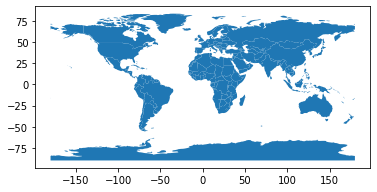

In [9]:
countries.to_geopandas(geometry="geometry").plot()

### Search with output selection

In [10]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.search_features("countries_ft",
                                  limit=1000,
                                  filter={},
                                  properties={"name": {}, "population": {}})

,name,population
0,Fiji,920938
1,Tanzania,53950935
2,W. Sahara,603253
3,Canada,35623680
4,United States of America,326625791
...,...,...
172,Serbia,7111024
173,Montenegro,642550
174,Kosovo,1895250
175,Trinidad and Tobago,1218208


### Search with filter

In [11]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.search_features(
    "countries_ft",
    filter={"equals": {"property": "continent", "value": "South America"}}
)

,external_id,name,continent,geometry,population,created_time,last_updated_time
0,Argentina,Argentina,South America,{'wkt': 'MULTIPOLYGON(((-68.63401022758323 -52...,44293293,1647617459880,1647617459880
1,Chile,Chile,South America,{'wkt': 'MULTIPOLYGON(((-68.63401022758323 -52...,17789267,1647617459880,1647617459880
2,Falkland Is.,Falkland Is.,South America,"{'wkt': 'POLYGON((-61.2 -51.85,-60 -51.25,-59....",2931,1647617459880,1647617459880
3,Uruguay,Uruguay,South America,{'wkt': 'POLYGON((-57.62513342958296 -30.21629...,3360148,1647617459880,1647617459880
4,Brazil,Brazil,South America,{'wkt': 'POLYGON((-53.373661668498244 -33.7683...,207353391,1647617459880,1647617459880
5,Bolivia,Bolivia,South America,{'wkt': 'POLYGON((-69.52967810736496 -10.95173...,11138234,1647617459880,1647617459880
6,Peru,Peru,South America,{'wkt': 'POLYGON((-69.89363521999663 -4.298186...,31036656,1647617459880,1647617459880
7,Colombia,Colombia,South America,{'wkt': 'POLYGON((-66.87632585312258 1.2533605...,47698524,1647617459880,1647617459880
8,Venezuela,Venezuela,South America,{'wkt': 'POLYGON((-60.73357418480372 5.2002772...,31304016,1647617459880,1647617459880
9,Guyana,Guyana,South America,{'wkt': 'POLYGON((-56.539385748914555 1.899522...,737718,1647617459880,1647617459880


In [12]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.search_features(
    "countries_ft",
    filter={"and": [
            { "equals": {"property": "continent", "value": "South America"} },
            { "range": { "gt": 10_000_000, "lt": 20_000_000, "property": "population"}},
    ]})

,external_id,name,continent,geometry,population,created_time,last_updated_time
0,Chile,Chile,South America,{'wkt': 'MULTIPOLYGON(((-68.63401022758323 -52...,17789267,1647617459880,1647617459880
1,Bolivia,Bolivia,South America,{'wkt': 'POLYGON((-69.52967810736496 -10.95173...,11138234,1647617459880,1647617459880
2,Ecuador,Ecuador,South America,{'wkt': 'POLYGON((-75.37322323271385 -0.152031...,16290913,1647617459880,1647617459880


In [13]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.search_features(
    "countries_ft",
    filter={
        "and": [
            {
                "not": {
                    "stWithin": {
                        "property": "geometry",
                        "value": { "wkt": "POLYGON((-180.0 0.0, 180.0 0.0, 180.0 90.0, -180.0 90.0, -180.0 0.0))"}
                    }
                }
            },
            {
                "range": {
                    "property": "population",
                    "gt": 200_000_000
                }
            }
          ]
    })

,external_id,name,continent,geometry,population,created_time,last_updated_time
0,Indonesia,Indonesia,Asia,{'wkt': 'MULTIPOLYGON(((141.00021040259185 -2....,260580739,1647617459880,1647617459880
1,Brazil,Brazil,South America,{'wkt': 'POLYGON((-53.373661668498244 -33.7683...,207353391,1647617459880,1647617459880


### Search with output CRS conversion

#### Web Mercator Projection

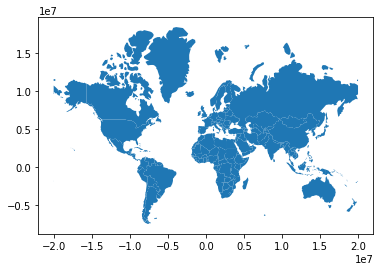

In [14]:
countries_3857 = client.geospatial.search_features(
    "countries_ft",
    limit=1000,
    filter={
        "stWithin": {
              "property": "geometry",
              "value": { "wkt": "POLYGON((-181.0 -85.05, 181.0 -85.05, 181.0 85.05, -181.0 85.05, -181.0 -85.05))"}
        }
    },
    properties={"geometry": { "srid": 3857 }}
).to_geopandas(geometry="geometry").plot()

#### Arctic Polar Stereographic

<AxesSubplot:>

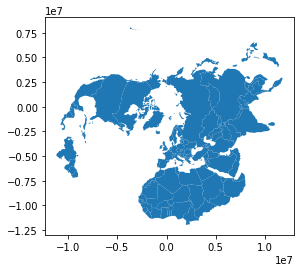

In [15]:
client.geospatial.search_features(
    "countries_ft",
    limit=1000,
    filter={
        "stWithin": {
            "property": "geometry",
            "value": { "wkt": "POLYGON((-181.0 0, 181.0 0, 181.0 90.0, -181.0 90.0, -181.0 0))"}
        }
    },
    properties={"geometry": { "srid": 3995 }}
).to_geopandas(geometry="geometry").plot()

## Coordinate Reference Systems (CRS)

In [16]:
client.geospatial.get_coordinate_reference_systems(srids=4326)[0].wkt

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]]'

In [17]:
client.geospatial.get_coordinate_reference_systems(srids=3995)[0].wkt

'PROJCS["WGS 84 / Arctic Polar Stereographic",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",71],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],AUTHORITY["EPSG","3995"]]'

In [18]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.list_coordinate_reference_systems()

,srid,wkt,proj_string
0,4168,"GEOGCS[""Accra"",DATUM[""Accra"",SPHEROID[""War Off...",+proj=longlat +a=6378300 +b=6356751.689189189 ...
1,4169,"GEOGCS[""American Samoa 1962"",DATUM[""American_S...","+proj=longlat +ellps=clrk66 +towgs84=-115,118,..."
2,4170,"GEOGCS[""SIRGAS 1995"",DATUM[""Sistema_de_Referen...","+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,..."
3,4171,"GEOGCS[""RGF93"",DATUM[""Reseau_Geodesique_Franca...","+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,..."
4,4172,"GEOGCS[""POSGAR"",DATUM[""Posiciones_Geodesicas_A...","+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,..."
...,...,...,...
8395,103967,"PROJCS[""NAD_1983_HARN_Adj_WI_Vilas_Feet (depre...",+proj=lcc +lat_0=45.625 +lon_0=-89.48888888888...
8396,103968,"PROJCS[""NAD_1983_HARN_Adj_WI_Walworth_Feet (de...",+proj=lcc +lat_0=41.6694444444444 +lon_0=-88.5...
8397,103969,"PROJCS[""NAD_1983_HARN_Adj_WI_Washburn_Feet (de...",+proj=lcc +lat_0=44.2666666666667 +lon_0=-91.7...
8398,103970,"PROJCS[""NAD_1983_HARN_Adj_WI_Waushara_Feet (de...",+proj=lcc +lat_0=43.7083333333333 +lon_0=-89.2...


## Streaming

In [19]:
feature_iterator = client.geospatial.stream_features("countries_ft",filter={})

In [20]:
for f in feature_iterator:
    print(f.name)

Fiji
Tanzania
W. Sahara
Canada
Kazakhstan
Uzbekistan
Papua New Guinea
Senegal
Qatar
Kuwait
United States of America
Haiti
Indonesia
Argentina
Dominican Rep.
Russia
Bahamas
Falkland Is.
Chile
Dem. Rep. Congo
Somalia
Kenya
Sudan
Chad
Norway
Greenland
Fr. S. Antarctic Lands
Timor-Leste
South Africa
Lesotho
Peru
Mexico
Uruguay
Brazil
Bolivia
Colombia
Panama
Costa Rica
Nicaragua
Honduras
El Salvador
Guatemala
Belize
Namibia
Venezuela
Guyana
Suriname
France
Ecuador
Puerto Rico
Jamaica
Cuba
Zimbabwe
Botswana
Mali
Mauritania
Benin
Niger
Nigeria
Cameroon
Togo
Ghana
Côte d'Ivoire
United Arab Emirates
Guinea
Guinea-Bissau
Liberia
Sierra Leone
Burkina Faso
Central African Rep.
Congo
Gabon
Eq. Guinea
Zambia
Malawi
Mozambique
eSwatini
Angola
Burundi
Israel
Lebanon
Madagascar
Palestine
Gambia
Tunisia
Algeria
Jordan
Iraq
Oman
Vanuatu
Cambodia
Thailand
Laos
Myanmar
Vietnam
North Korea
South Korea
Mongolia
India
Bangladesh
Bhutan
Nepal
Pakistan
Afghanistan
Tajikistan
Kyrgyzstan
Turkmenistan
Iran
Syria
A

## Aggregate features

### Count all countries

In [21]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.aggregate_features(
    "countries_ft",
    filter = {},
    property = "name",
    aggregates=["count"],
)

,count
0,177


### Count the population of all countries

In [22]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.aggregate_features(
    "countries_ft",
    filter = {},
    property = "population",
    aggregates=["sum"],
)

,sum
0,7383089462


### Count the population in Africa

In [23]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.aggregate_features(
    "countries_ft",
    filter = { "equals": {"property": "continent", "value": "Africa"} },
    property = "population",
    aggregates=["sum"],
)

,sum
0,1219176238


### Compute the collection of all african countries

In [24]:
# NBVAL_IGNORE_OUTPUT
african_collection = client.geospatial.aggregate_features(
    "countries_ft",
    filter = { "equals": {"property": "continent", "value": "Africa"} },
    property = "geometry",
    aggregates=["stCollect"],
)
african_collection

,st_collect
0,{'wkt': 'GEOMETRYCOLLECTION(POLYGON((33.903711...


<AxesSubplot:>

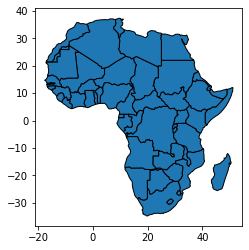

In [25]:
FeatureList(
    resources = [
        Feature(externalId = "african_collection", geometry = african_collection[0].st_collect)
    ]
).to_geopandas(geometry = "geometry").plot(edgecolor='black')

### Compute the union of all african countries

In [26]:
# NBVAL_IGNORE_OUTPUT
african_union = client.geospatial.aggregate_features(
    "countries_ft",
    filter = { "equals": {"property": "continent", "value": "Africa"} },
    property = "geometry",
    aggregates=["stUnion"],
)
african_union

,st_union
0,{'wkt': 'MULTIPOLYGON(((49.54351891459575 -12....


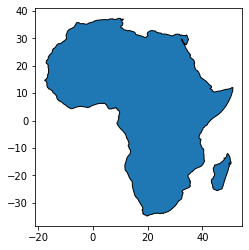

In [27]:
gpd = FeatureList(
    resources = [
        Feature(externalId = "african_union", geometry = african_union[0].st_union)
    ]
).to_geopandas(geometry = "geometry").plot(edgecolor='black')

### Aggregate by grouping

In [28]:
# NBVAL_IGNORE_OUTPUT
client.geospatial.aggregate_features(
    "countries_ft",
    filter = {},
    property = "geometry",
    group_by = ["continent"],
    aggregates = ["stUnion"],
)

,st_union,continent
0,{'wkt': 'MULTIPOLYGON(((-66.95992000000001 -54...,South America
1,{'wkt': 'MULTIPOLYGON(((-163.7128956777287 -78...,Antarctica
2,"{'wkt': 'POLYGON((68.935 -48.62500000000001,69...",Seven seas (open ocean)
3,{'wkt': 'MULTIPOLYGON(((169.66781456937315 -43...,Oceania
4,{'wkt': 'MULTIPOLYGON(((49.54351891459575 -12....,Africa
5,{'wkt': 'MULTIPOLYGON(((120.29501427620689 -10...,Asia
6,{'wkt': 'MULTIPOLYGON(((-61.68000000000001 10....,North America
7,{'wkt': 'MULTIPOLYGON(((-51.65779741067889 4.1...,Europe


### Multiple aggregations simultaneously

In [29]:
# NBVAL_IGNORE_OUTPUT
multi_aggregation = client.geospatial.aggregate_features(
    "countries_ft",
    filter = {},
    property = "geometry",
    group_by = ["continent"],
    aggregates=["stUnion", "stConvexHull", "stCentroid", "stCollect"],
)
multi_aggregation

,st_union,st_convex_hull,st_centroid,st_collect,continent
0,{'wkt': 'MULTIPOLYGON(((-66.95992000000001 -54...,{'wkt': 'POLYGON((-68.14862999999991 -55.61183...,{'wkt': 'POINT(-60.87852343037837 -15.47992133...,{'wkt': 'GEOMETRYCOLLECTION(MULTIPOLYGON(((-68...,South America
1,{'wkt': 'MULTIPOLYGON(((-163.7128956777287 -78...,"{'wkt': 'POLYGON((-179.99999999999994 -90,-179...",{'wkt': 'POINT(20.571000569842635 -80.49198288...,{'wkt': 'GEOMETRYCOLLECTION(MULTIPOLYGON(((-48...,Antarctica
2,"{'wkt': 'POLYGON((68.935 -48.62500000000001,69...","{'wkt': 'POLYGON((68.745 -49.775000000000006,6...",{'wkt': 'POINT(69.5315804704237 -49.3064549116...,{'wkt': 'MULTIPOLYGON(((68.935 -48.62500000000...,Seven seas (open ocean)
3,{'wkt': 'MULTIPOLYGON(((169.66781456937315 -43...,{'wkt': 'POLYGON((169.33233117093428 -46.64123...,{'wkt': 'POINT(136.7657441400341 -25.318839300...,{'wkt': 'GEOMETRYCOLLECTION(MULTIPOLYGON(((180...,Oceania
4,{'wkt': 'MULTIPOLYGON(((49.54351891459575 -12....,{'wkt': 'POLYGON((19.61640506356457 -34.819166...,{'wkt': 'POINT(18.20681606303627 6.45017389255...,{'wkt': 'GEOMETRYCOLLECTION(POLYGON((33.903711...,Africa
5,{'wkt': 'MULTIPOLYGON(((120.29501427620689 -10...,{'wkt': 'POLYGON((123.57998172413669 -10.35998...,{'wkt': 'POINT(84.58721745505024 32.2774586444...,{'wkt': 'GEOMETRYCOLLECTION(POLYGON((87.359970...,Asia
6,{'wkt': 'MULTIPOLYGON(((-61.68000000000001 10....,{'wkt': 'POLYGON((-80.8864009264208 7.22054149...,{'wkt': 'POINT(-92.17997258026274 56.615373062...,{'wkt': 'GEOMETRYCOLLECTION(MULTIPOLYGON(((-12...,North America
7,{'wkt': 'MULTIPOLYGON(((-51.65779741067889 4.1...,{'wkt': 'POLYGON((-53.41846513529531 2.0533891...,{'wkt': 'POINT(78.61807963385773 60.0009331520...,{'wkt': 'GEOMETRYCOLLECTION(MULTIPOLYGON(((178...,Europe


<AxesSubplot:>

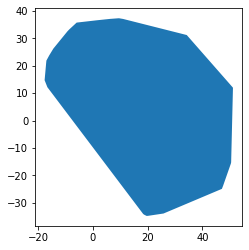

In [30]:
FeatureList(resources = [
    Feature(externalId = "africa", geometry = list(filter(lambda x: x.continent=="Africa", multi_aggregation))[0].st_convex_hull)
]).to_geopandas(geometry = "geometry").plot()

## Delete feature type

In [31]:
client.geospatial.delete_feature_types(external_id="countries_ft", recursive=True)